In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [4]:

# Load dataset
project = pd.read_csv("C:/Users/JAMES/Downloads/JAMES DATA SET.csv")
project

Age  Gender    Income  Credit Score  Credit History Length  \
0     31.0    Male   36000.0         604.0                  487.0   
1     25.0    Male   50000.0         447.0                  386.0   
2     62.0   Other  178000.0         850.0                  503.0   
3     69.0  Female   46000.0         668.0                  349.0   
4     52.0    Male  132000.0         601.0                  553.0   
...    ...     ...       ...           ...                    ...   
5995  39.0    Male   42000.0         685.0                  350.0   
5996  61.0  Female  107000.0         580.0                  250.0   
5997  56.0   Other   37000.0         595.0                  351.0   
5998  43.0    Male  105000.0         426.0                  474.0   
5999   NaN     NaN       NaN           NaN                    NaN   

      Number of Existing Loans  Loan Amount  Loan Tenure Existing Customer  \
0                          5.0     109373.0        221.0                No   
1                          2.0     150000.0         89.0                No   
2                         10.0      69099.0        110.0               Yes   
3                          6.0     150000.0        148.0               Yes   
4                          5.0     150000.0        157.0                No   
...                        ...          ...          ...               ...   
5995                       7.0      21479.0        229.0               Yes   
5996                       5.0      55072.0         97.0                No   
5997                       5.0     150000.0         81.0                No   
5998                       2.0      91931.0        104.0                No   
5999                       NaN          NaN          NaN               NaN   

              State                City  LTV Ratio Employment Profile  \
0         Karnataka              Mysuru  90.943430           Salaried   
1         Karnataka           Bengaluru  91.135253           Salaried   
2     Uttar Pradesh              Kanpur  40.000000           Salaried   
3         Karnataka           Bengaluru  87.393365      Self-Employed   
4         Karnataka              Mysuru  66.158757           Salaried   
...             ...                 ...        ...                ...   
5995          Delhi           New Delhi  79.801740            Student   
5996      Karnataka           Bengaluru  92.286198      Self-Employed   
5997         Kerala  Thiruvananthapuram  64.240432           Salaried   
5998      Karnataka           Bengaluru  88.167796           Salaried   
5999            NaN                 NaN        NaN                NaN   

      Profile Score         Occupation  
0              77.0             Doctor  
1              43.0  Software Engineer  
2              90.0             Banker  
3              86.0         Contractor  
4              90.0            Teacher  
...             ...                ...  
5995           79.0            Student  
5996           49.0         Shopkeeper  
5997           93.0            Teacher  
5998           57.0            Teacher  
5999            NaN                NaN  

[6000 rows x 15 columns]

In [5]:
project.isna().sum()

Age                           1
Gender                        1
Income                        1
Credit Score                  1
Credit History Length         1
Number of Existing Loans      1
Loan Amount                   1
Loan Tenure                   1
Existing Customer             1
State                         1
City                          1
LTV Ratio                     1
Employment Profile            1
Profile Score                 1
Occupation                  389
dtype: int64

In [6]:

# Drop rows with missing values
project.dropna(inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Existing Customer', 'State', 'City', 'Employment Profile', 'Occupation']
for col in categorical_cols:
    label = LabelEncoder()
    project[col] = label.fit_transform(project[col])
    label_encoders[col] = label

project

Age  Gender    Income  Credit Score  Credit History Length  \
0     31.0       1   36000.0         604.0                  487.0   
1     25.0       1   50000.0         447.0                  386.0   
2     62.0       2  178000.0         850.0                  503.0   
3     69.0       0   46000.0         668.0                  349.0   
4     52.0       1  132000.0         601.0                  553.0   
...    ...     ...       ...           ...                    ...   
5994  62.0       1   86000.0         739.0                  184.0   
5995  39.0       1   42000.0         685.0                  350.0   
5996  61.0       0  107000.0         580.0                  250.0   
5997  56.0       2   37000.0         595.0                  351.0   
5998  43.0       1  105000.0         426.0                  474.0   

      Number of Existing Loans  Loan Amount  Loan Tenure  Existing Customer  \
0                          5.0     109373.0        221.0                  0   
1                          2.0     150000.0         89.0                  0   
2                         10.0      69099.0        110.0                  1   
3                          6.0     150000.0        148.0                  1   
4                          5.0     150000.0        157.0                  0   
...                        ...          ...          ...                ...   
5994                       7.0     149251.0        306.0                  1   
5995                       7.0      21479.0        229.0                  1   
5996                       5.0      55072.0         97.0                  0   
5997                       5.0     150000.0         81.0                  0   
5998                       2.0      91931.0        104.0                  0   

      State  City  LTV Ratio  Employment Profile  Profile Score  Occupation  
0         2    15  90.943430                   1           77.0           4  
1         2     1  91.135253                   1           43.0          10  
2         8     9  40.000000                   1           90.0           0  
3         2     1  87.393365                   2           86.0           3  
4         2    15  66.158757                   1           90.0          12  
...     ...   ...        ...                 ...            ...         ...  
5994      5    22  68.871119                   0           96.0           6  
5995      0    18  79.801740                   3           79.0          11  
5996      2     1  92.286198                   2           49.0           9  
5997      3    21  64.240432                   1           93.0          12  
5998      2     1  88.167796                   1           57.0          12  

[5611 rows x 15 columns]

In [7]:

# Selecting features (X) and targets (Y)
X = project.drop(columns=['Existing Customer'])
Y_clf = project['Existing Customer'] # Classification target

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:

# Splitting data (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_clf, test_size=0.8, random_state=42)


In [9]:

# Classification Model
clf_model = LogisticRegression()
clf_model.fit(X_train, Y_train)
Y_pred = clf_model.predict(X_test)
clf_accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy",round(clf_accuracy*100,1),"%")

Accuracy 97.4 %


In [10]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2805
           1       0.95      0.99      0.97      1684

    accuracy                           0.97      4489
   macro avg       0.97      0.98      0.97      4489
weighted avg       0.97      0.97      0.97      4489



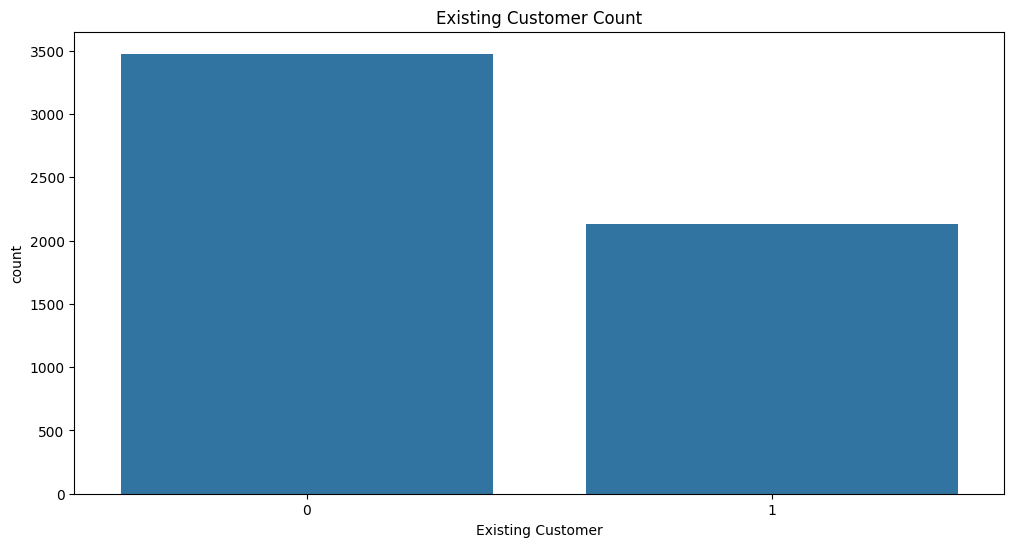

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x=project['Existing Customer'])
plt.title("Existing Customer Count")
plt.show();

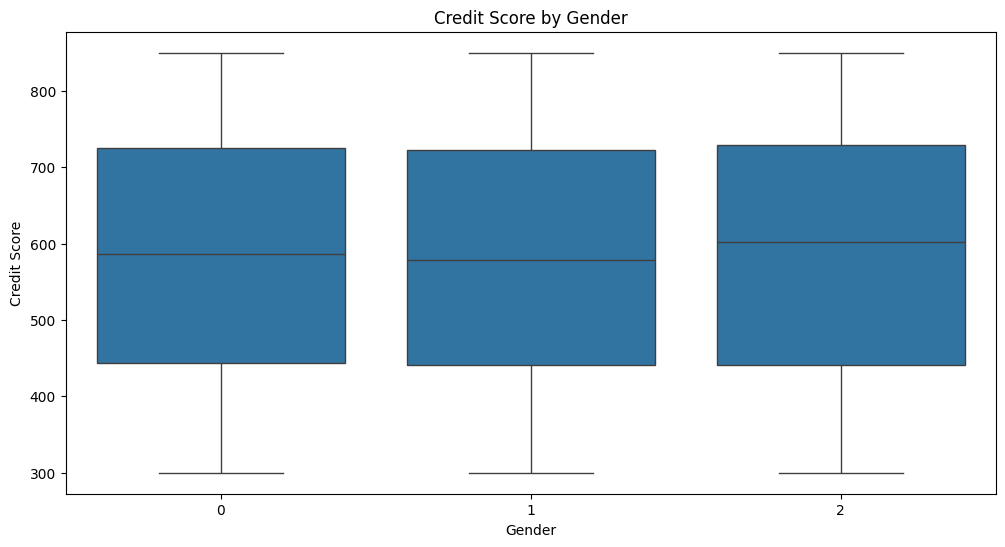

In [12]:

plt.figure(figsize=(12,6))
sns.boxplot(x=project['Gender'], y=project['Credit Score'])
plt.title("Credit Score by Gender")
plt.show();


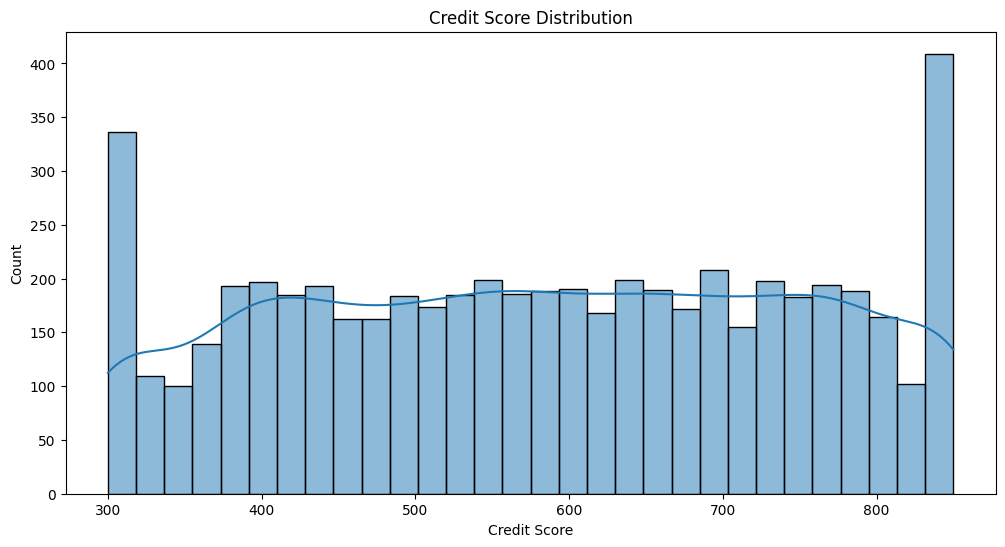

In [13]:

plt.figure(figsize=(12,6))
sns.histplot(project['Credit Score'], kde=True, bins=30)
plt.title("Credit Score Distribution")
plt.show();


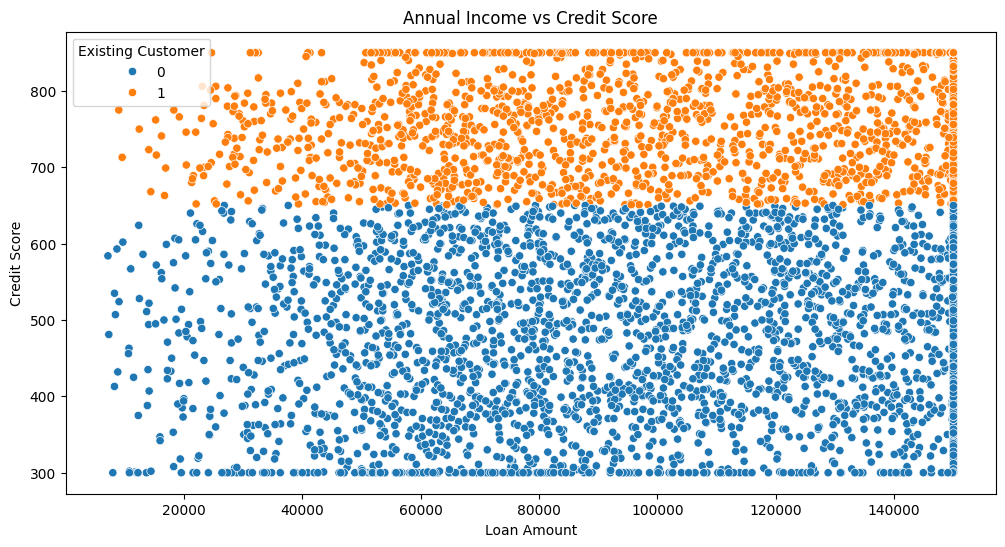

In [14]:

plt.figure(figsize=(12,6))
sns.scatterplot(x=project['Loan Amount'], y=project['Credit Score'], hue=project['Existing Customer'])
plt.title("Annual Income vs Credit Score")
plt.show();